In [1]:
import warnings
warnings.filterwarnings('ignore')

<h1 style = "fontsize:400%;text-align:center;">QBUS3850: Time Series and Forecasting</h1>
<h2 style = "fontsize:300%;text-align:center;">Volatility Forecasting</h2>
<h3 style = "fontsize:200%;text-align:center;">Lecture Notes</h3>

<h2 style = "fontsize:300%;text-align:center;">Volatility forecasting</h2>

# Overview

- Focus on volatility forecasts
  - Short horizons
  - Long horizons
- How to evaluate volatility forecasts
  - Volatility proxies

# Volatility forecasts ARCH(1)

- Let $\hat{\sigma}^2_t(h)$ be the $h$-step ahead forecast of variance at time $t$ 
$$\hat{\sigma}^2_t(1) = \alpha_0+\alpha_1u^2_t$$
- Can set up a recursion

$$\begin{aligned} \hat{\sigma}^2_t(1) &= \alpha_0+\alpha_1u^2_t\\
\hat{\sigma}^2_t(h)& = \alpha_0+\alpha_1u^2_{t+h-1}\quad(\color{blue}{\hat{\sigma}^2_t(h-1)=E\left[ u^2_{t+h-1}\right]})\\
&=\alpha_0+\alpha_1\hat{\sigma}^2_t(h-1)\end{aligned}$$

By recursion $\hat{\sigma}_t(h)=\alpha_0(1+\alpha_1+\alpha^2_1+\dots+\alpha_1^{h-1})+\alpha_1^hu_t^2$. As $h\rightarrow\infty$

$$\hat{\sigma}_t(\infty)=\frac{\alpha_0}{1-\alpha_1}$$



# Volatility forecasts for other models

- Think about the following two questions:
  - Suppose the ARCH(1,1) has an AR(1) model in the mean. How will this affect the long term volatility forecast?
  - Should $\phi$ be part of the volatilty forecast?


# Long run volatility forecast of AR(1)-ARCH(1)

Recall even for a constant variance model, the stationary variance of an AR(1) is given by

$$\frac{\sigma^2}{1-\phi^2}$$

For an ARCH(1,1) the unconditional variance (of returns) is

$$Var(r_t^2)=\frac{\alpha_0}{(1-\alpha)(1-\phi)}$$



# Example

- Consider BHP returns again

In [2]:
import pandas as pd
import numpy as np
bhp = pd.read_csv('BHP.AX.csv')
bhp['Date'] = pd.to_datetime(bhp['Date'])
ret=np.log(bhp['Close']).diff()[1:]
from arch import arch_model

# ARCH model

Train with 900 observations and hold out 300 observations

In [3]:
split=900
hor = 100
ararchfit = arch_model(ret, mean='ARX', lags = 1, vol='ARCH', p=1, rescale=100).fit(last_obs=split,disp='off')
print(ararchfit)
fcararch = ararchfit.forecast(horizon = hor,start=split)
fcvarararch = fcararch.variance.iloc[split,:]


                           AR - ARCH Model Results                            
Dep. Variable:                  Close   R-squared:                       0.004
Mean Model:                        AR   Adj. R-squared:                  0.003
Vol Model:                       ARCH   Log-Likelihood:                2278.35
Distribution:                  Normal   AIC:                          -4548.70
Method:            Maximum Likelihood   BIC:                          -4529.50
                                        No. Observations:                  899
Date:                Mon, Apr 25 2022   Df Residuals:                      895
Time:                        21:36:00   Df Model:                            4
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const      9.0066e-06  6.472e-04  1.392e-02      0.989 

# Check formulas

In [4]:
print(ararchfit.params['omega']/((1-ararchfit.params['alpha[1]'])*(1-ararchfit.params['Close[1]']**2.0)))
print(ararchfit.params['omega']/((1-ararchfit.params['alpha[1]'])))
print(fcvarararch.tail(1))

0.0003782354425269004
0.00037699663301601704
h.100    0.000378
Name: 901, dtype: float64


# Plot

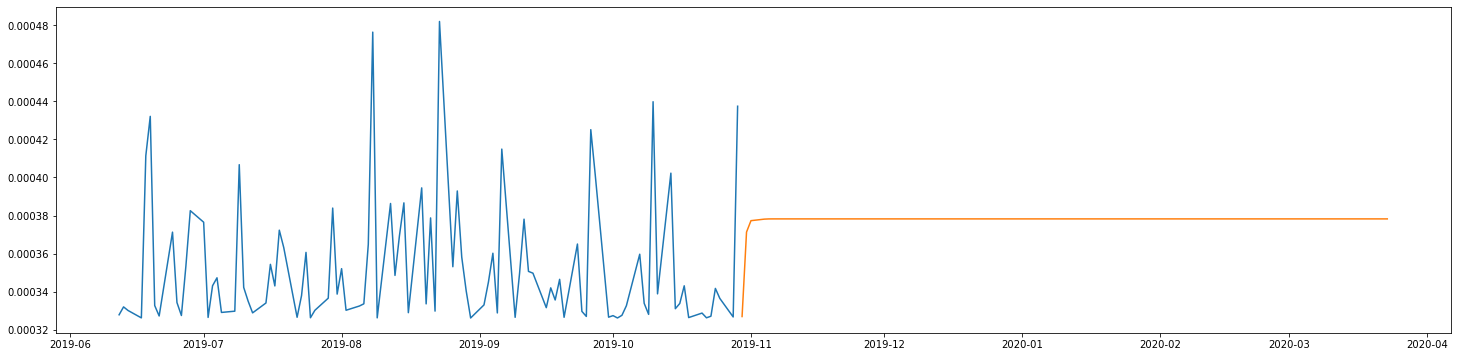

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25,6))
ax.plot(bhp['Date'].iloc[-(hor+100):-hor],pow(ararchfit.conditional_volatility[split-100:split],2))
ax.plot(bhp['Date'].iloc[-hor:],fcvarararch)


# ARCH model

Hereafter assume constant mean

In [6]:
archfit = arch_model(ret, mean='Constant', vol='ARCH', p=1,rescale=100).fit(last_obs=split,disp='off')
print(archfit)
fcarch = archfit.forecast(horizon = hor,start=split)
fcvararch = fcarch.variance.iloc[split,:]


                      Constant Mean - ARCH Model Results                      
Dep. Variable:                  Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                       ARCH   Log-Likelihood:                2280.24
Distribution:                  Normal   AIC:                          -4554.48
Method:            Maximum Likelihood   BIC:                          -4540.07
                                        No. Observations:                  900
Date:                Mon, Apr 25 2022   Df Residuals:                      897
Time:                        21:36:00   Df Model:                            3
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         3.2600e-05  6.541e-04  4.984e-02      0.960 

# Plot

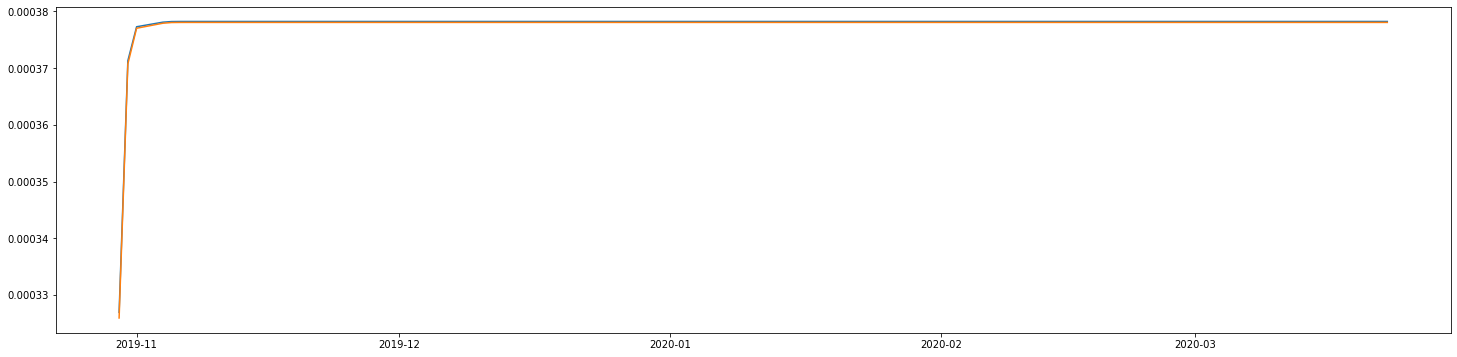

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25,6))
ax.plot(bhp['Date'].iloc[-hor:],fcvarararch)
ax.plot(bhp['Date'].iloc[-hor:],fcvararch)


# Formula for GARCH model

- Volatility forecasts for a GARCH(1,1) model also found by recursion.

$$\hat{\sigma}_t(1)=\alpha_0+\alpha_1u_t^2+\beta\sigma_t$$

For two step ahead (use $u^2_{t+1}=\sigma^2_{t+1}\epsilon_t^2$)

$$\begin{aligned}\hat{\sigma}_t(2)&=\alpha_0+\alpha_1u_{t+1}^2+\beta\sigma^2_{t+1}\\
&=\alpha_0+\alpha_1\sigma^2_{t+1}\epsilon_t^2+\beta\sigma^2_{t+1}\\
&=\alpha_0+(\alpha_1+\beta_1)\sigma^2_{t+1}+\alpha_1\sigma^2_{t+1}(\epsilon_t^2-1)\\
&=\alpha_0+(\alpha_1+\beta_1)\hat{\sigma}^2_{t}(1)\end{aligned}$$

Can replace $(\epsilon_t^2-1)$ by its expectation which is zero.

# Recursion

In general

$$\hat{\sigma}_t(h)=\alpha_0+(\alpha_1+\beta_1)\sigma^2_{t}(h-1)$$

Which after recursion

$$\hat{\sigma}_t(h)=\alpha_0(1+(\alpha_1+\beta_1)+(\alpha_1+\beta_1)^2+\dots+(\alpha_1+\beta_1)^{h-2})+(\alpha_1+\beta_1)^{h-1}\hat{\sigma}_t(1)$$

As $h\rightarrow\infty$

$$\hat{\sigma}_t(\infty)=\frac{\alpha_0}{1-(\alpha_1+\beta_1)^2}$$

# GARCH model

Repeat for GARCH(1,1)

In [8]:
garchfit = arch_model(ret, mean='Constant', vol='GARCH', p=1, q=1, rescale=100).fit(last_obs=split,disp='off')
print(garchfit)
fcgarch = garchfit.forecast(horizon = hor,start=split)
fcvargarch = fcgarch.variance.iloc[split,:]


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                2337.71
Distribution:                  Normal   AIC:                          -4667.41
Method:            Maximum Likelihood   BIC:                          -4648.21
                                        No. Observations:                  900
Date:                Mon, Apr 25 2022   Df Residuals:                      896
Time:                        21:36:01   Df Model:                            4
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         5.1373e-04  6.136e-06     83.719      0.000 [5.

# Your turn

- Use the formula to find the unconditional variance of the fitted GARCH(1,1) model
- Are we converging quickly or slowly?
- How is this related to the parameters?

# Plot

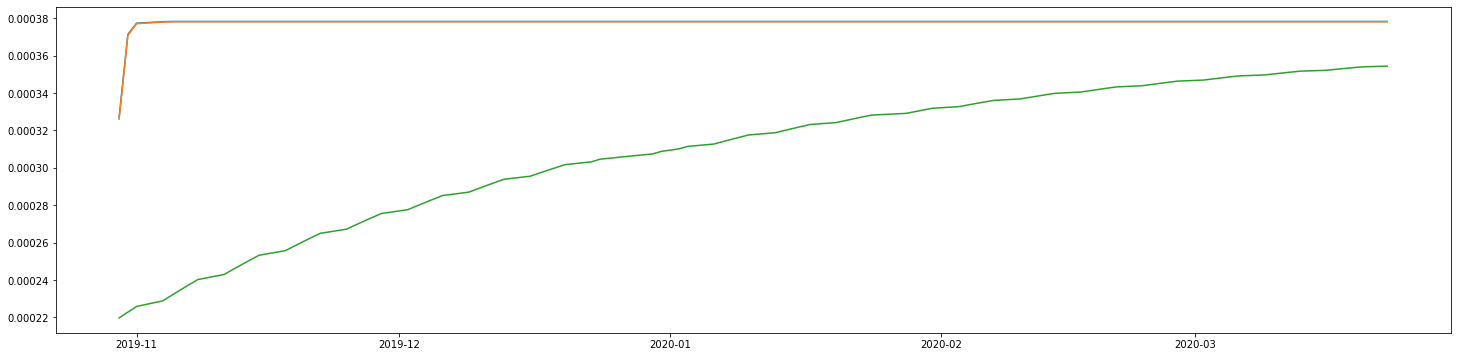

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25,6))
ax.plot(bhp['Date'].iloc[-hor:],fcvarararch)
ax.plot(bhp['Date'].iloc[-hor:],fcvararch)
ax.plot(bhp['Date'].iloc[-hor:],fcvargarch)


# EWMA

In [10]:
from arch.univariate import EWMAVariance, ConstantMean
ewma=arch_model(ret)
ewma.mean = ConstantMean()
ewma.mean = EWMAVariance(lam = 0.01)
ewmafit = ewma.fit(last_obs=split,disp='off')
fcewma = ewmafit.forecast(horizon = hor,start=split)
fcvarewma = fcewma.variance.iloc[split,:]


# Plot

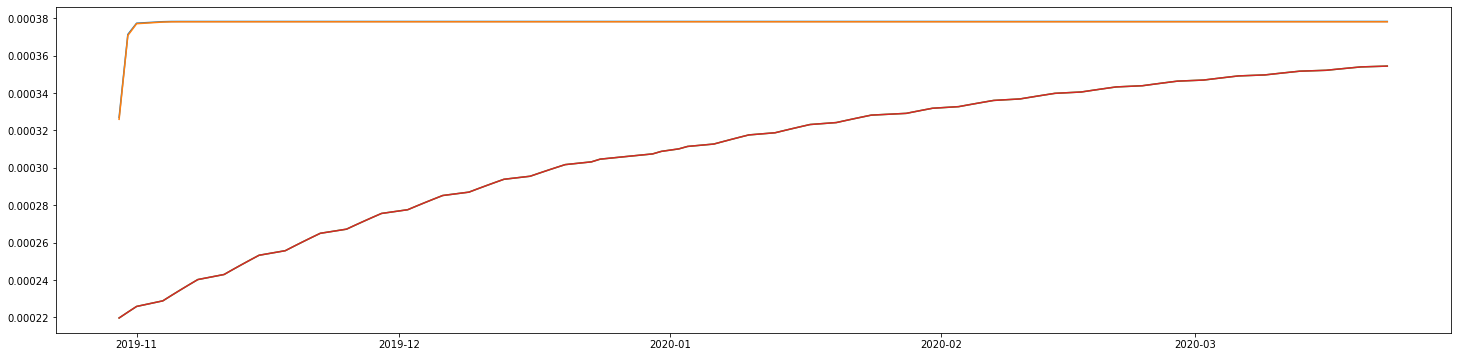

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25,6))
ax.plot(bhp['Date'].iloc[-hor:],fcvarararch)
ax.plot(bhp['Date'].iloc[-hor:],fcvararch)
ax.plot(bhp['Date'].iloc[-hor:],fcvargarch)
ax.plot(bhp['Date'].iloc[-hor:],fcvarewma)

# Takeaway

- Volatility forecasts of most models will revert to something close to the (unconditional) stationary variance.
- How quickly volatility forecasts revert depends on model parameters
  - In an ARCH(1), size of $\alpha_1$
  - In an GARCH(1,1), size of $\alpha_1+\beta_1$
- If AR terms are included in the mean, this also must be taken into account.
  

<h2 style = "fontsize:300%;text-align:center;">Evalating volatility forecasts</h2>

# Evaluating forecasts

- From a model we get forecasts $\hat{\sigma}^2_t$
- We can simply compare these to the true volatilities $\sigma^2_t$
- We then compute RMSE, MAE or other forecast metrics.
- Easy...
- But what is wrong with this?

# Volatility proxies

- Need some proxy for the true volatility process.
- It cannot just be volatilities estimated from a model since the purpose is to evaluate models.
- Often need to use additional information and assumptions.
- Can evaluate either $\sigma_t$ or $\sigma_t^2$ so need proxies for both.

# Volatility proxy 1

- The simplest volatility proxy only uses demeaned returns $u_t$
- The proxy is 

$$\tilde{\sigma}^2_t=u^2_t\textrm{ or }\tilde{\sigma}_t=|u_t|$$

- The problem is that this is very inefficient!
- For Gaussian errors what is the probability that $\tilde{\sigma}_t$ is anywhere between 0 and two times the true value of ${\sigma}_t$?

# Simulation

In [12]:
sim_mod = arch_model(ret,mean='Constant',vol='GARCH', p=1, q=1)
r = sim_mod.simulate(garchfit.params,100)
r.head()

,data,volatility,errors
0,0.021612,0.022766,0.021098
1,0.009106,0.022622,0.008592
2,0.011014,0.022071,0.010500
3,0.039898,0.021588,0.039385
4,-0.028038,0.022771,-0.028551


# Plot

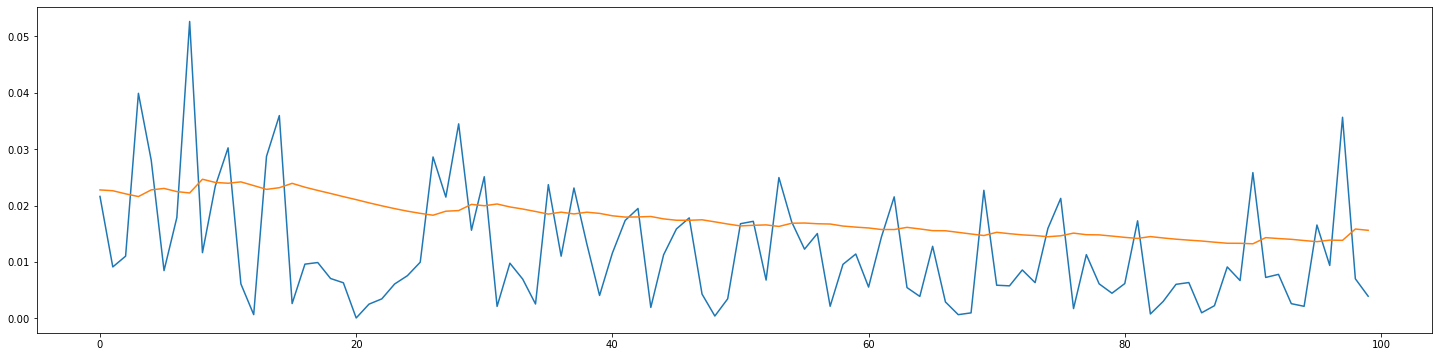

In [13]:
fig, ax =plt.subplots(figsize = (25,6))
ax.plot(range(100),np.abs(r.data))
ax.plot(range(100),r.volatility)

# Additional info

- Easy to get information on open and closing price as well as daily high and low

![alt](BHPinfo.png)

# Volatility proxy 2

Parkinson (1980) proposed

$$\tilde{\sigma}_t^2=R^2_t/4ln(2)\approx0.3607 R^2_t\,\textrm{ or }\, \tilde{\sigma}_t\approx\sqrt{0.3607} R_t$$

and $R^2=log(H_t/L_t)$ where $H_t$ is the daily high and $L_t$ is the daily low.

- The idea is to assume that intraday returns follow a normal random walk with a constant volatility.
- The expected value of the range will depend on the volatility.


# Volatility proxy 3

Improves on Parkinson (1980) proxy by accounting for overnight movements

$$\tilde{\sigma}_t^2= \frac{0.83}{f}0.3607 R^2_t+\frac{0.17}{1-f}(\log(O_t/C_{t-1}))^2$$

Where $O_t$ and $C_{t-1}$ are the opening and closing price and $f$ is the fraction of a day for which the market is closed ($f=0.75$ in Australia).

# Comparison

- Garman and Klass (1980) show that proxy 2 and proxy 3 are around 5.2 and 6.2 times more efficient that proxy 1.
- By efficiency this means that the variance of proxy 1 is 5.2 times bigger than proxy 2 and proxy 3 is 6.2 times bigger than proxy 1.
- They assume a continuous time random walk diffusion for prices.
- A continous time random walk model is like a random walk but where the time interval over which data are observed is infinitely small.


# Volatility proxy 4

Proposed by Alizadeh, Brandt and Diebold (2002)

$$\tilde{\sigma}_t^2=\exp(2\log(R_t^2)-0.86+2\times0.29^2)$$

This comes from from assuming a continuous time model with changing volatility and finding that the log range is normally distributed. Also

$$\tilde{\sigma}_t=\exp(\log(R_t^2)-0.43+0.29^2)$$




# Other proxies

- More proxies are available if there is access to high frequency data.
- For instance if 5-minute returns are available a better (daily) volatility proxy can be estimated as
$$\tilde{\sigma}^2_t=\sum_{j=1}^J r^2_{t,j}$$
- These are known as Realised Volatility (RV) proxies.
- Also, RV can be used in the models themselves.
- Data are generally not (freely) available.

# Example

- Compute the proxies for the four series

In [14]:
proxy1 = np.abs(ret)
dayrange =np.log(bhp['High']/bhp['Low'])
proxy2 = np.sqrt(1/(4 * np.log(2)))*dayrange[1:]
overnight=((np.log(bhp['Open'].iloc[1:]/bhp['Close'].iloc[:-1]))**2.0)
proxy3 = np.sqrt((0.83/0.75)*(proxy2**2.0)+(0.17/0.25)*overnight)
proxy4 = np.exp(np.log(dayrange)-0.43+0.29**2.0)

# Plot

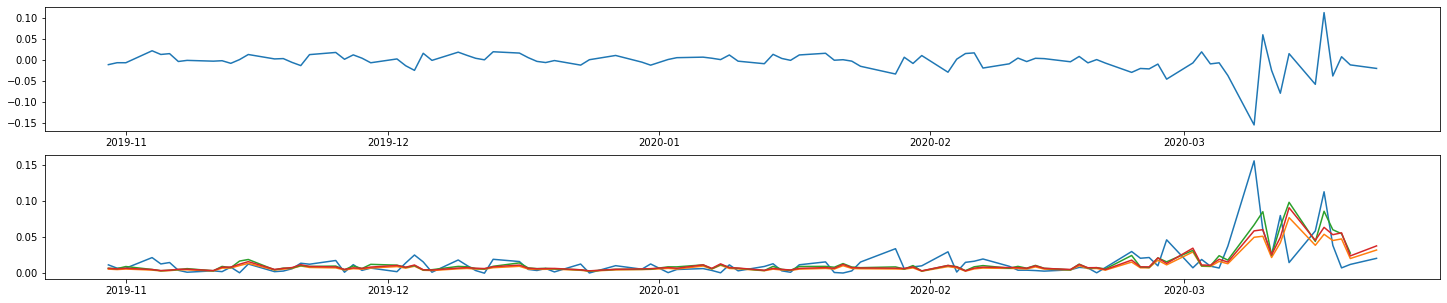

In [15]:
fig, ax = plt.subplots(2,1,figsize=(25,5))
ax[0].plot(bhp['Date'].iloc[-100:],ret[-100:])
ax[1].plot(bhp['Date'].iloc[-100:],proxy1[-100:])
ax[1].plot(bhp['Date'].iloc[-100:],proxy2[-100:])
ax[1].plot(bhp['Date'].iloc[-100:],proxy3[-100:])
ax[1].plot(bhp['Date'].iloc[-100:],proxy4[-100:])

# Summary

- The first volatility proxy is very noisy.
- The other three volatility proxies are much closer to one another.
- Each volatility proxy relies on its own set of assumptions.
- When doing forecast evaluation use all proxies.
- In tutorials you will use these proxies for evaluating volatility forecasts.